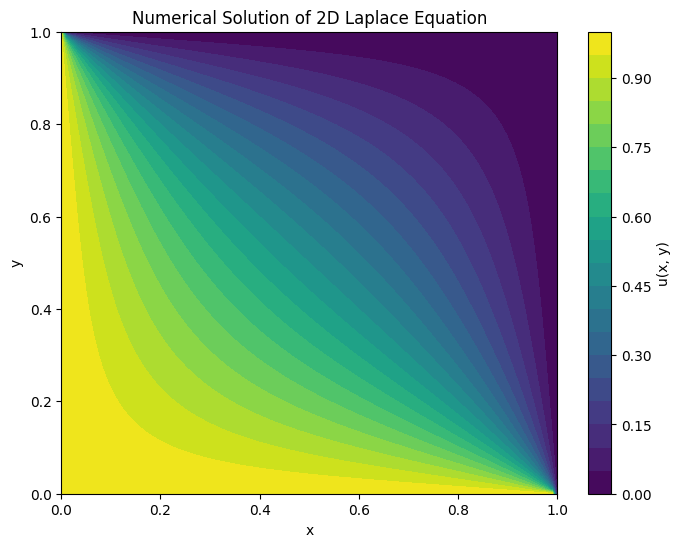

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Domain parameters
Lx, Ly = 1,1  # Domain size in x and y
Nx, Ny = 100, 100  # Number of grid points
dx, dy = Lx / (Nx - 1), Ly / (Ny - 1)  # Grid spacing
tolerance = 1e-7  # Convergence tolerance

# Boundary conditions
def f(y): return 1  # u(0, y) = f(y)
def g(y): return 0  # u(1, y) = g(y)
def h(x): return 1  # u(x, 0) = h(x)
def q(x): return 10  # u(x, 1) = q(x)
def s(x): return 0  # u(x, 1) = q(x)

# Initialize the solution grid with zeros
u = np.zeros((Nx, Ny))

# Apply boundary conditions
u[:, 0] = h(np.linspace(0, Lx, Nx))  # Bottom boundary
u[:, -1] = s(np.linspace(0, Lx, Nx))  # Top boundary
u[0, :] = f(np.linspace(0, Ly, Ny))  # Left boundary
u[-1, :] = g(np.linspace(0, Ly, Ny))  # Right boundary
# u[20, :] = s(np.linspace(0, Ly, Ny))  # Midle boundary


# Neumann condition (no flow) on the top and bottom boundaries
# u[1:-1, 0] = u[1:-1, 1]      # Bottom boundary, ∂u/∂y = 0
# u[25:75, -1] = u[25:75, -2]    # Top boundary, ∂u/∂y = 0

# Iterative solution using the finite difference method
error = 1.0  # Initialize error
while error > tolerance:
    u_old = u.copy()
    
    # Update the interior points using the finite difference scheme
    u[1:-1, 1:-1] = 0.25 * (u_old[2:, 1:-1] + u_old[:-2, 1:-1] +
                            u_old[1:-1, 2:] + u_old[1:-1, :-2])
    

    # Neumann condition (no flow in x-direction at x = 1): ∂u/∂x = 0
    # u[74, 85:-1] = u[75, 85:-1]
    # u[1:-1,0]=u[1:-1,1]
    # u[25:75, -1] = u[25:75, -2]    # Top boundary, ∂u/∂y = 0

    # Compute the error as the maximum difference between old and new values
    error = np.max(np.abs(u - u_old))

# Plot the results
X, Y = np.meshgrid(np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny))
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, u.T, 20, cmap="viridis")
plt.colorbar(label="u(x, y)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Numerical Solution of 2D Laplace Equation")
plt.show()

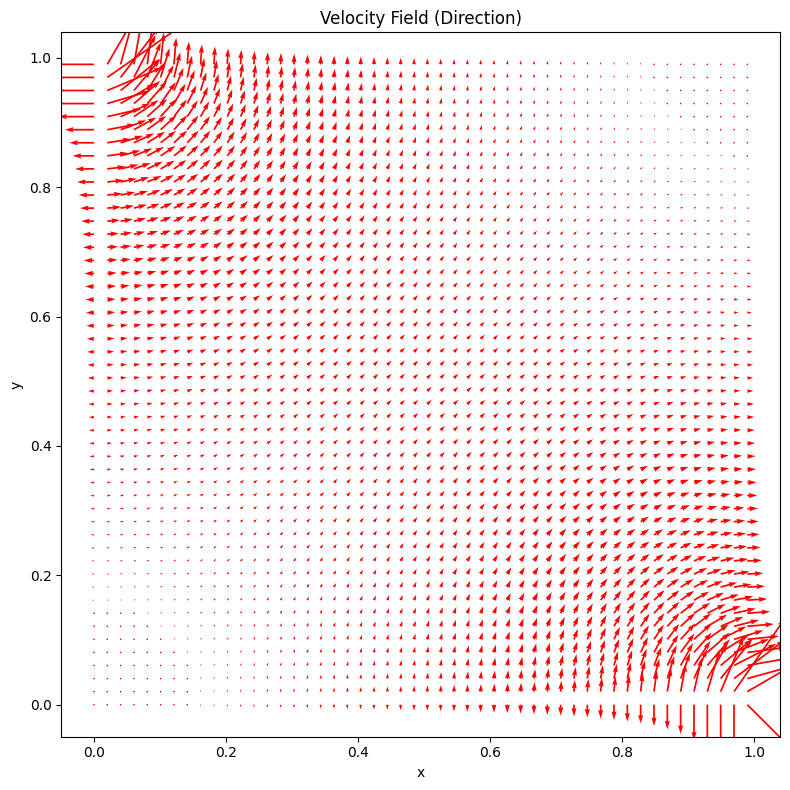

In [2]:
# Define the downsampling rate for the arrows
pil_x = pil_y = 40  # Number of arrows in x and y directions
K=1

# Compute velocity field (v_x and v_y) from the gradient of u
v_x = np.zeros_like(u)
v_y = np.zeros_like(u)

# Central differences for interior points
v_x[1:-1, :] = (u[2:, :] - u[:-2, :]) / (2 * dx)
v_y[:, 1:-1] = (u[:, 2:] - u[:, :-2]) / (2 * dy)

# Forward/backward differences for boundaries
v_x[0, :] = -K*(u[1, :] - u[0, :]) / dx  # Left boundary
v_x[-1, :] = -K*(u[-1, :] - u[-2, :]) / dx  # Right boundary
v_y[:, 0] = -K*(u[:, 1] - u[:, 0]) / dy  # Bottom boundary
v_y[:, -1] = -K*(u[:, -1] - u[:, -2]) / dy  # Top boundary

# Full grid for plotting the potential field
X, Y = np.meshgrid(np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny))

# Downsample for arrow plotting
step_x = Nx // pil_x
step_y = Ny // pil_y
X_downsampled = X[::step_x, ::step_y]
Y_downsampled = Y[::step_x, ::step_y]
v_x_downsampled = v_x[::step_x, ::step_y]
v_y_downsampled = v_y[::step_x, ::step_y]

# Plot the potential field
plt.figure(figsize=(8, 8))

# Plot the velocity field (direction and magnitude) on downsampled grid
plt.quiver(X_downsampled, Y_downsampled, -v_x_downsampled.T, -v_y_downsampled.T, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Velocity Field (Direction)")

plt.tight_layout()
plt.show()